# Car Price Prediction Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.lines as mlines
import sklearn as sk
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df.shape

(6019, 12)

In [ ]:
price_data,price_test_data = train_test_split(df,test_size = 0.1)

In [ ]:
print(price_data.shape)
print(price_test_data.shape)

(5417, 12)
(602, 12)


In [ ]:
price_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3235,Volvo S60 D4 KINETIC,Ahmedabad,2015,34000,Diesel,Automatic,First,9.0 kmpl,1984 CC,181 bhp,5.0,20.00
877,Honda City i DTEC VX,Kochi,2015,80606,Diesel,Manual,First,25.1 kmpl,1498 CC,98.6 bhp,5.0,6.96
3290,Ford Fiesta 1.4 SXi TDCi,Hyderabad,2008,83000,Diesel,Manual,Second,17.8 kmpl,1399 CC,null bhp,5.0,2.40
5116,Tata Indica V2 2001-2011 eLS,Hyderabad,2015,80500,Diesel,Manual,First,25.0 kmpl,1396 CC,69 bhp,5.0,2.45
3335,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2010,63298,Petrol,Automatic,First,14.53 kmpl,1794 CC,138.1 bhp,5.0,3.95


In [ ]:
price_test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3193,Hyundai Elantra CRDi SX,Bangalore,2012,36000,Diesel,Manual,Second,22.7 kmpl,1582 CC,126.24 bhp,5.0,7.50
1467,Maruti Ciaz ZDi SHVS,Chennai,2014,45000,Diesel,Manual,First,28.09 kmpl,1248 CC,88.5 bhp,5.0,6.85
3295,Maruti Wagon R LXI CNG,Delhi,2013,62000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,2.80
709,Honda City 1.3 EXI S,Delhi,2011,100000,Petrol,Manual,First,13.0 kmpl,1343 CC,90 bhp,5.0,3.50
2433,Ford Figo Diesel ZXI,Kolkata,2011,60000,Diesel,Manual,First,20.0 kmpl,1399 CC,68 bhp,5.0,2.25


# Exploratory Data Analysis 

In [ ]:
price_data.shape

(5417, 12)

In [ ]:
price_test_data.shape

(602, 12)

In our training dataset we have both categorical and numerical data. We can divide our data as follows:
Independent variables:

1. Categorical variables: Location, Fuel_type, Transmission, Owner_Type,Seats
2. Numerical variables: Year, Kilometers_Driven, Mileage, Engine, Power
3. Nominal variable: Name

Dependent variables:
1. Price (Numerical variable)

In [ ]:
price_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5417.000000,5.417000e+03,5378.000000,5417.000000
mean,2013.352409,5.866539e+04,5.271848,9.510986
std,3.283678,9.545130e+04,0.799451,11.239217
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.385800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
price_test_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,602.000000,602.000000,599.000000,602.000000
mean,2013.410299,59395.194352,5.340568,9.195864
std,3.143717,36135.108329,0.887034,10.720084
min,1998.000000,1000.000000,2.000000,0.450000
25%,2012.000000,35002.500000,5.000000,3.500000
50%,2014.000000,54000.000000,5.000000,5.500000
75%,2016.000000,73208.500000,5.000000,8.900000
max,2019.000000,250000.000000,10.000000,75.000000


In [ ]:
price_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
price_test_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5417 entries, 3235 to 5090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5415 non-null   object 
 8   Engine             5383 non-null   object 
 9   Power              5383 non-null   object 
 10  Seats              5378 non-null   float64
 11  Price              5417 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 550.2+ KB


In [ ]:
price_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 3193 to 1503
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               602 non-null    object 
 1   Location           602 non-null    object 
 2   Year               602 non-null    int64  
 3   Kilometers_Driven  602 non-null    int64  
 4   Fuel_Type          602 non-null    object 
 5   Transmission       602 non-null    object 
 6   Owner_Type         602 non-null    object 
 7   Mileage            602 non-null    object 
 8   Engine             600 non-null    object 
 9   Power              600 non-null    object 
 10  Seats              599 non-null    float64
 11  Price              602 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 61.1+ KB


Outlining unique categorical variables-

In [ ]:
price_data.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
price_data.Transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
price_data.Owner_Type.unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [ ]:
price_data.Location.unique()

array(['Ahmedabad', 'Kochi', 'Hyderabad', 'Mumbai', 'Bangalore',
       'Chennai', 'Delhi', 'Kolkata', 'Jaipur', 'Coimbatore', 'Pune'],
      dtype=object)

Check if any data consists of null values-

In [ ]:
price_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               34
Power                34
Seats                39
Price                 0
dtype: int64

In [ ]:
price_test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               2
Power                2
Seats                3
Price                0
dtype: int64

In [ ]:
price_test_data[price_test_data['Power']=='null bhp']['Power'].count()

9

In [ ]:
price_data[price_data['Power']=='null bhp']['Power'].count()

98

In [ ]:
price_data['Power']= price_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
price_test_data['Power']= price_test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
price_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                34
Power                132
Seats                 39
Price                  0
dtype: int64

In [ ]:
price_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                2
Power                11
Seats                 3
Price                 0
dtype: int64

In [ ]:
price_data.dropna(how = 'any',inplace = True)
price_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
price_data.shape

(5282, 12)

In [ ]:
price_test_data.dropna(inplace= True)
price_test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
price_test_data.shape

(590, 12)

Convert all numerical variables to numerical values in the data-

In [ ]:
columns_to_be_converted = ['Power','Engine','Mileage']

def remove_units_from_data(list_of_columns_with_units):
    for i in range(len(list_of_columns_with_units)):
        price_data[list_of_columns_with_units[i]] = price_data[list_of_columns_with_units[i]].str.split(" " , expand = True)
        price_data[list_of_columns_with_units[i]] = price_data[list_of_columns_with_units[i]].astype("float")
        price_test_data[list_of_columns_with_units[i]] = price_test_data[list_of_columns_with_units[i]].str.split(" " , expand = True)
        price_test_data[list_of_columns_with_units[i]] = price_test_data[list_of_columns_with_units[i]].astype("float")

        
remove_units_from_data(columns_to_be_converted)
price_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3235,Volvo S60 D4 KINETIC,Ahmedabad,2015,34000,Diesel,Automatic,First,9.00,1984.0,181.0,5.0,20.00
877,Honda City i DTEC VX,Kochi,2015,80606,Diesel,Manual,First,25.10,1498.0,98.6,5.0,6.96
5116,Tata Indica V2 2001-2011 eLS,Hyderabad,2015,80500,Diesel,Manual,First,25.00,1396.0,69.0,5.0,2.45
3335,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2010,63298,Petrol,Automatic,First,14.53,1794.0,138.1,5.0,3.95
231,Chevrolet Beat LT,Kochi,2016,60813,Petrol,Manual,Second,18.60,1199.0,76.8,5.0,3.32


In [ ]:
price_test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3193,Hyundai Elantra CRDi SX,Bangalore,2012,36000,Diesel,Manual,Second,22.70,1582.0,126.24,5.0,7.50
1467,Maruti Ciaz ZDi SHVS,Chennai,2014,45000,Diesel,Manual,First,28.09,1248.0,88.50,5.0,6.85
3295,Maruti Wagon R LXI CNG,Delhi,2013,62000,CNG,Manual,First,26.60,998.0,58.16,5.0,2.80
709,Honda City 1.3 EXI S,Delhi,2011,100000,Petrol,Manual,First,13.00,1343.0,90.00,5.0,3.50
2433,Ford Figo Diesel ZXI,Kolkata,2011,60000,Diesel,Manual,First,20.00,1399.0,68.00,5.0,2.25


To make this model more robust, I am converting the year column to the column of the car's age, basically how many years it has been since it launched-

In [ ]:
current_year = 2020
price_data.Year = current_year - price_data.Year 
price_data.rename(columns ={'Year':'Years_since_launch'},inplace = True)
price_data.head()

,Name,Location,Years_since_launch,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3235,Volvo S60 D4 KINETIC,Ahmedabad,5,34000,Diesel,Automatic,First,9.00,1984.0,181.0,5.0,20.00
877,Honda City i DTEC VX,Kochi,5,80606,Diesel,Manual,First,25.10,1498.0,98.6,5.0,6.96
5116,Tata Indica V2 2001-2011 eLS,Hyderabad,5,80500,Diesel,Manual,First,25.00,1396.0,69.0,5.0,2.45
3335,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,10,63298,Petrol,Automatic,First,14.53,1794.0,138.1,5.0,3.95
231,Chevrolet Beat LT,Kochi,4,60813,Petrol,Manual,Second,18.60,1199.0,76.8,5.0,3.32


In [ ]:
price_test_data.Year = current_year - price_test_data.Year
price_test_data.rename(columns ={'Year':'Years_since_launch'},inplace =True)
price_test_data.head()

,Name,Location,Years_since_launch,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3193,Hyundai Elantra CRDi SX,Bangalore,8,36000,Diesel,Manual,Second,22.70,1582.0,126.24,5.0,7.50
1467,Maruti Ciaz ZDi SHVS,Chennai,6,45000,Diesel,Manual,First,28.09,1248.0,88.50,5.0,6.85
3295,Maruti Wagon R LXI CNG,Delhi,7,62000,CNG,Manual,First,26.60,998.0,58.16,5.0,2.80
709,Honda City 1.3 EXI S,Delhi,9,100000,Petrol,Manual,First,13.00,1343.0,90.00,5.0,3.50
2433,Ford Figo Diesel ZXI,Kolkata,9,60000,Diesel,Manual,First,20.00,1399.0,68.00,5.0,2.25


Extracting new columns of Brand and car model from the Name column as they are the significant information out of that column which influence the price of the car - 

In [ ]:
car_train_info = price_data['Name'].str.split(" ", n =2,expand = True)
price_data['Car_Brand'] = car_train_info[0]
price_data['Car_Model'] = car_train_info[1]
price_data['Car_Specifications'] = car_train_info[2]
price_data.drop(columns = ['Name'] ,inplace =True)
price_data

,Location,Years_since_launch,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Specifications
3235,Ahmedabad,5,34000,Diesel,Automatic,First,9.00,1984.0,181.0,5.0,20.00,Volvo,S60,D4 KINETIC
877,Kochi,5,80606,Diesel,Manual,First,25.10,1498.0,98.6,5.0,6.96,Honda,City,i DTEC VX
5116,Hyderabad,5,80500,Diesel,Manual,First,25.00,1396.0,69.0,5.0,2.45,Tata,Indica,V2 2001-2011 eLS
3335,Mumbai,10,63298,Petrol,Automatic,First,14.53,1794.0,138.1,5.0,3.95,Toyota,Corolla,Altis 2008-2013 1.8 VL AT
231,Kochi,4,60813,Petrol,Manual,Second,18.60,1199.0,76.8,5.0,3.32,Chevrolet,Beat,LT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Pune,3,9000,Petrol,Manual,First,15.40,1497.0,117.3,7.0,8.50,Honda,BR-V,i-VTEC S MT
5557,Bangalore,3,16500,Diesel,Automatic,First,17.90,2143.0,136.0,5.0,34.00,Mercedes-Benz,GLA,Class 200 CDI SPORT
5012,Kochi,2,42243,Diesel,Manual,First,27.39,1248.0,74.0,5.0,7.48,Maruti,Baleno,Alpha 1.3
1921,Pune,6,81000,Diesel,Manual,First,15.10,2179.0,140.0,7.0,9.00,Mahindra,XUV500,W8 4WD


In [ ]:
price_data = price_data[['Car_Brand','Car_Model','Car_Specifications','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats','Price']]
price_data.head()

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
3235,Volvo,S60,D4 KINETIC,Ahmedabad,5,34000,First,Diesel,Automatic,9.00,1984.0,181.0,5.0,20.00
877,Honda,City,i DTEC VX,Kochi,5,80606,First,Diesel,Manual,25.10,1498.0,98.6,5.0,6.96
5116,Tata,Indica,V2 2001-2011 eLS,Hyderabad,5,80500,First,Diesel,Manual,25.00,1396.0,69.0,5.0,2.45
3335,Toyota,Corolla,Altis 2008-2013 1.8 VL AT,Mumbai,10,63298,First,Petrol,Automatic,14.53,1794.0,138.1,5.0,3.95
231,Chevrolet,Beat,LT,Kochi,4,60813,Second,Petrol,Manual,18.60,1199.0,76.8,5.0,3.32


In [ ]:
#for test data
car_test_info = price_test_data['Name'].str.split(" ", n =2,expand = True)
price_test_data['Car_Brand'] = car_test_info[0]
price_test_data['Car_Model'] = car_test_info[1]
price_test_data['Car_Specifications'] = car_test_info[2]
price_test_data.drop(columns = ['Name'] ,inplace =True)
price_test_data = price_test_data[['Car_Brand','Car_Model','Car_Specifications','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
price_test_data.head()

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
3193,Hyundai,Elantra,CRDi SX,Bangalore,8,36000,Second,Diesel,Manual,22.70,1582.0,126.24,5.0
1467,Maruti,Ciaz,ZDi SHVS,Chennai,6,45000,First,Diesel,Manual,28.09,1248.0,88.50,5.0
3295,Maruti,Wagon,R LXI CNG,Delhi,7,62000,First,CNG,Manual,26.60,998.0,58.16,5.0
709,Honda,City,1.3 EXI S,Delhi,9,100000,First,Petrol,Manual,13.00,1343.0,90.00,5.0
2433,Ford,Figo,Diesel ZXI,Kolkata,9,60000,First,Diesel,Manual,20.00,1399.0,68.00,5.0


### Now after dropping null values, removing the units and converting the year column, and adding the brand and car model columns, this is our price data-

In [ ]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 3235 to 5090
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           5282 non-null   object 
 1   Car_Model           5282 non-null   object 
 2   Car_Specifications  5282 non-null   object 
 3   Location            5282 non-null   object 
 4   Years_since_launch  5282 non-null   int64  
 5   Kilometers_Driven   5282 non-null   int64  
 6   Owner_Type          5282 non-null   object 
 7   Fuel_Type           5282 non-null   object 
 8   Transmission        5282 non-null   object 
 9   Mileage             5282 non-null   float64
 10  Engine              5282 non-null   float64
 11  Power               5282 non-null   float64
 12  Seats               5282 non-null   float64
 13  Price               5282 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 619.0+ KB


In [ ]:
price_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 3193 to 1503
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           590 non-null    object 
 1   Car_Model           590 non-null    object 
 2   Car_Specifications  590 non-null    object 
 3   Location            590 non-null    object 
 4   Years_since_launch  590 non-null    int64  
 5   Kilometers_Driven   590 non-null    int64  
 6   Owner_Type          590 non-null    object 
 7   Fuel_Type           590 non-null    object 
 8   Transmission        590 non-null    object 
 9   Mileage             590 non-null    float64
 10  Engine              590 non-null    float64
 11  Power               590 non-null    float64
 12  Seats               590 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 64.5+ KB


# Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


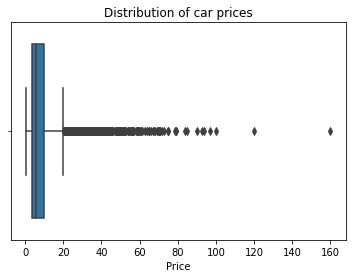

In [ ]:
plt.title('Distribution of car prices')
sb.boxplot(price_data.Price)

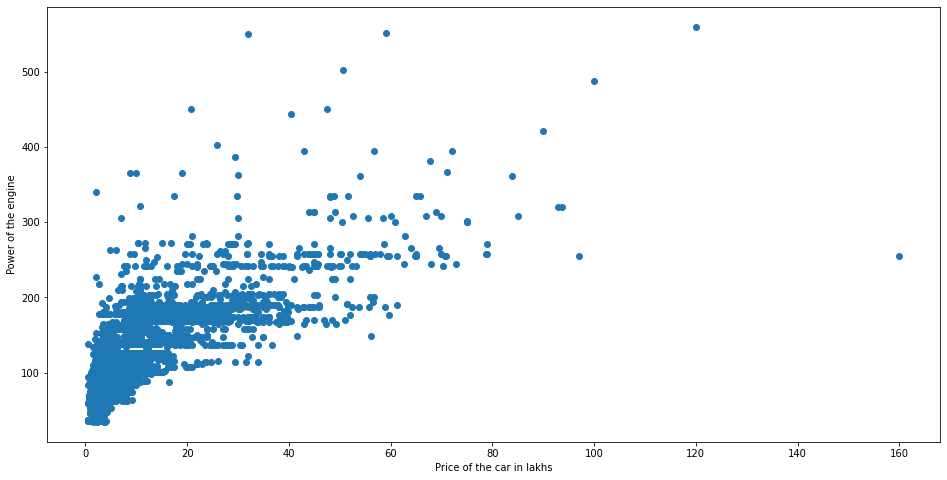

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(price_data['Price'], price_data['Power'])
ax.set_xlabel('Price of the car in lakhs')
ax.set_ylabel('Power of the engine')
plt.show()

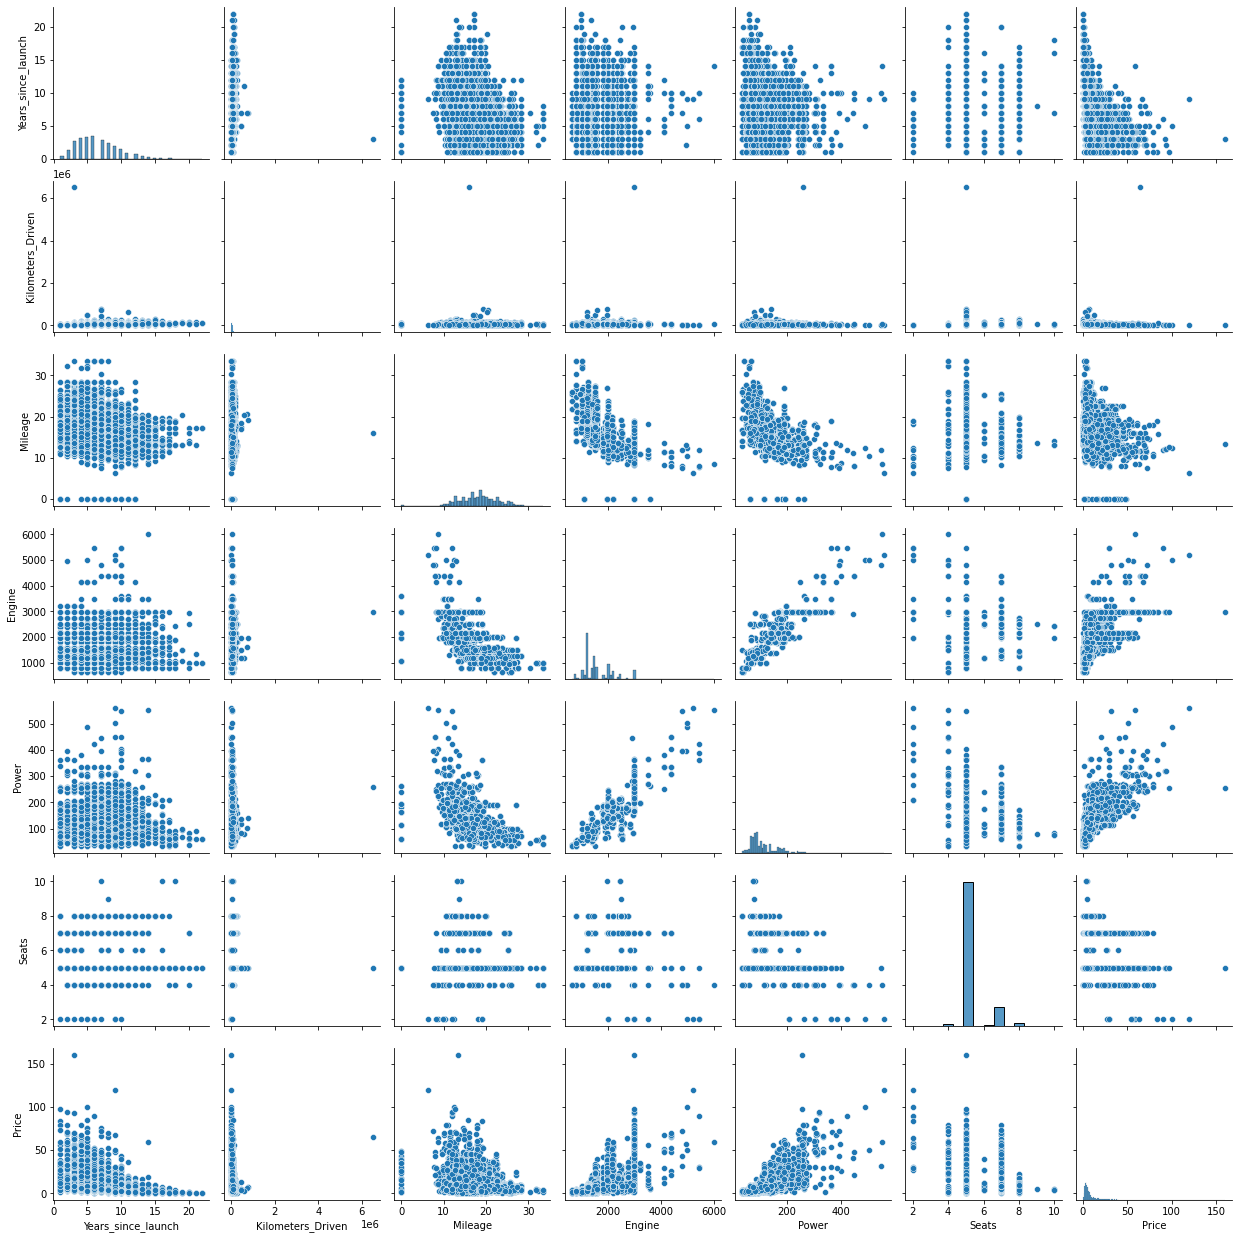

In [ ]:
sb.pairplot(price_data)

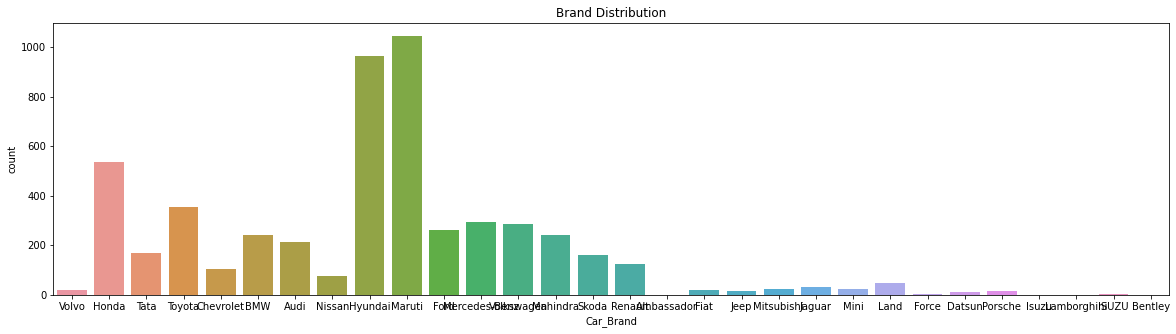

In [ ]:
plt.figure(figsize=(20,5))

c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.title("Brand Distribution")
sb.countplot(x=price_data['Car_Brand'])

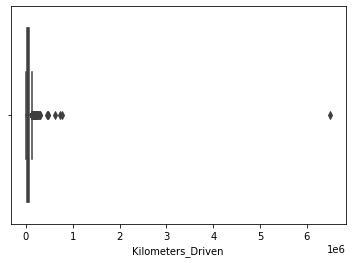

In [ ]:
sb.boxplot(x=price_data['Kilometers_Driven'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; y

Text(0.5, 1.0, 'Price vs location with influence of Owner_type')

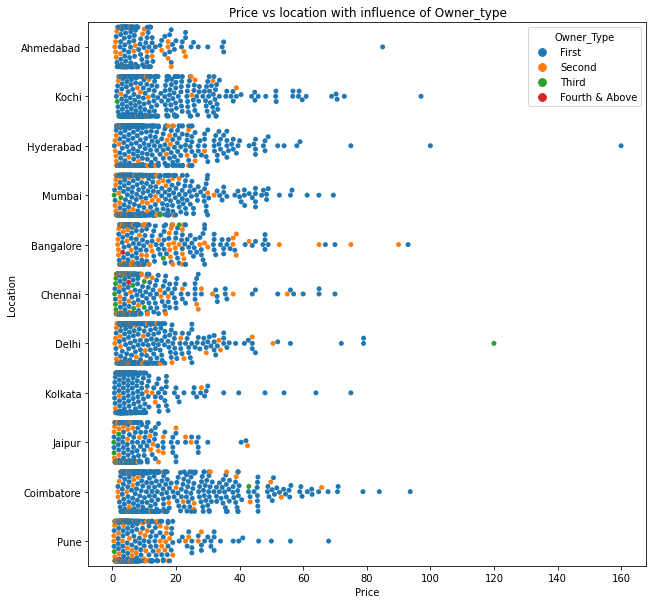

In [ ]:
plt.figure(figsize=(10,10))
sb.swarmplot(y=price_data['Location'],x=price_data['Price'],hue=price_data["Owner_Type"])
plt.title("Price vs location with influence of Owner_type")

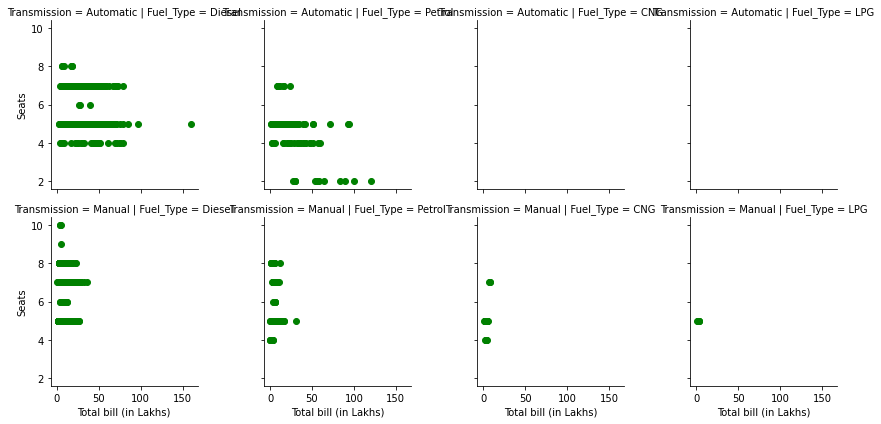

In [ ]:
g = sb.FacetGrid(price_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Seats", color="g")
      .set_axis_labels("Total bill (in Lakhs)", "Seats"))

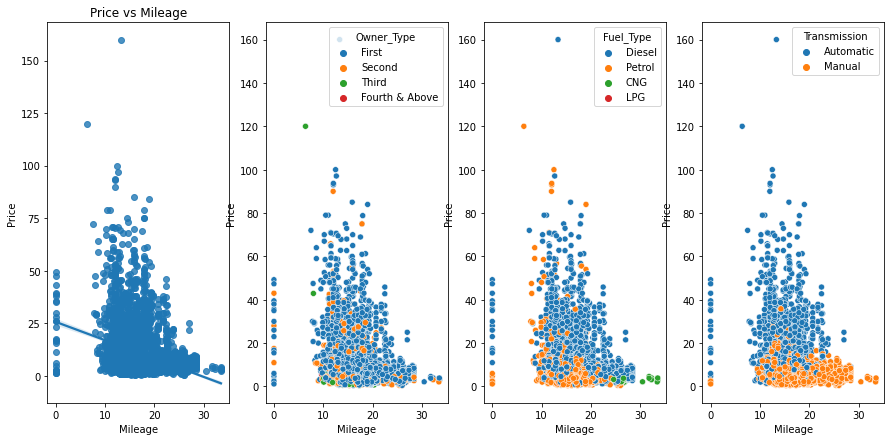

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=price_data['Mileage'],y=price_data['Price'])
plt.title("Price vs Mileage")
plt.subplot(1,4,2)
sb.scatterplot(x=price_data['Mileage'],y=price_data['Price'],hue=price_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=price_data['Mileage'],y=price_data['Price'],hue=price_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=price_data['Mileage'],y=price_data['Price'],hue=price_data['Transmission'])

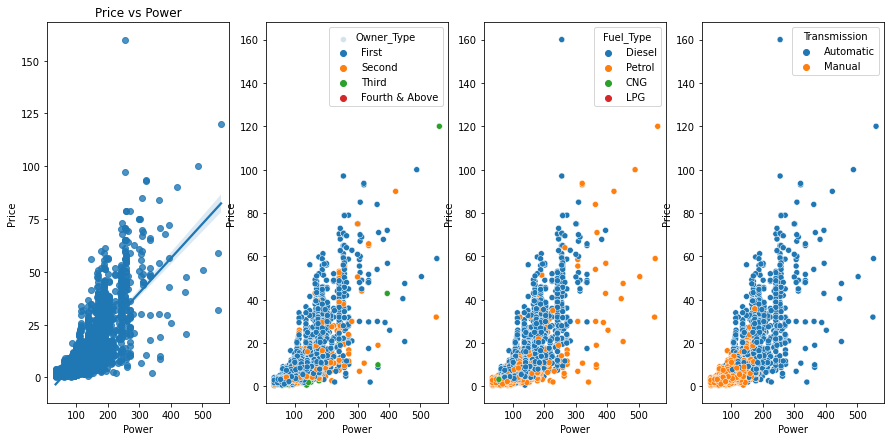

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=price_data['Power'],y=price_data['Price'])
plt.title("Price vs Power")
plt.subplot(1,4,2)
sb.scatterplot(x=price_data['Power'],y=price_data['Price'],hue=price_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=price_data['Power'],y=price_data['Price'],hue=price_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=price_data['Power'],y=price_data['Price'],hue=price_data['Transmission'])

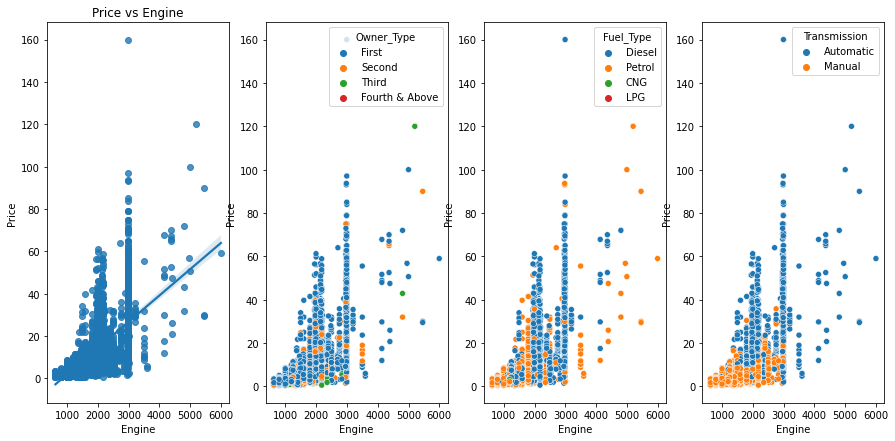

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=price_data['Engine'],y=price_data['Price'])
plt.title("Price vs Engine")
plt.subplot(1,4,2)
sb.scatterplot(x=price_data['Engine'],y=price_data['Price'],hue=price_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=price_data['Engine'],y=price_data['Price'],hue=price_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=price_data['Engine'],y=price_data['Price'],hue=price_data['Transmission'])

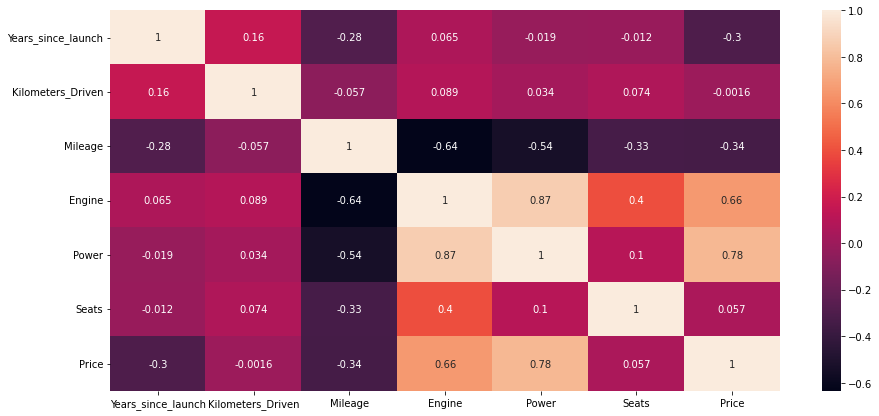

In [ ]:
plt.figure(figsize= (15,7))

sb.heatmap(price_data.corr(), annot=True)

# Feature Selection -

### Assign categorical variables to a unique value based on a condition - 

In [ ]:
price_data.head(20)

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
3235,Volvo,S60,D4 KINETIC,Ahmedabad,5,34000,First,Diesel,Automatic,9.00,1984.0,181.00,5.0,20.00
877,Honda,City,i DTEC VX,Kochi,5,80606,First,Diesel,Manual,25.10,1498.0,98.60,5.0,6.96
5116,Tata,Indica,V2 2001-2011 eLS,Hyderabad,5,80500,First,Diesel,Manual,25.00,1396.0,69.00,5.0,2.45
3335,Toyota,Corolla,Altis 2008-2013 1.8 VL AT,Mumbai,10,63298,First,Petrol,Automatic,14.53,1794.0,138.10,5.0,3.95
231,Chevrolet,Beat,LT,Kochi,4,60813,Second,Petrol,Manual,18.60,1199.0,76.80,5.0,3.32
4695,Toyota,Etios,Cross 1.4L VD,Bangalore,6,57464,First,Diesel,Manual,23.59,1364.0,67.06,5.0,5.75
298,Toyota,Innova,Crysta 2.4 ZX MT,Chennai,4,48000,First,Diesel,Manual,13.68,2393.0,147.80,7.0,20.25
2260,BMW,5,Series 520d Luxury Line,Ahmedabad,8,95000,Second,Diesel,Automatic,22.48,1995.0,190.00,5.0,17.50
1954,Audi,A3,35 TDI Technology,Delhi,3,22000,Second,Diesel,Automatic,20.38,1968.0,143.00,5.0,22.50
5205,Nissan,Terrano,XL Plus 85 PS,Kolkata,6,40000,First,Diesel,Manual,20.45,1461.0,83.80,5.0,5.75


In [ ]:
unrelated_cat_variables = ['Car_Brand','Fuel_Type','Location','Owner_Type','Transmission']
related_cat_variables = ['Car_Model']

def convert_categorical_numerical(categorical_list):
    for i in range(len(categorical_list)):
        uniques = price_data[categorical_list[i]].unique()
        num = list(np.arange(price_data[categorical_list[i]].nunique()))
        price_data[categorical_list[i]] = price_data[categorical_list[i]].map({t : n+1 for t,n in zip(uniques,num)})
        #test_uniques = price_test_data[categorical_list[i]].unique()
        #test_num = list(np.arange(price_test_data[categorical_list[i]].nunique()))
        price_test_data[categorical_list[i]] = price_test_data[categorical_list[i]].map({t : n+1 for t,n in zip(uniques,num)})

convert_categorical_numerical(unrelated_cat_variables)
price_data

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
3235,1,S60,D4 KINETIC,1,5,34000,1,1,1,9.00,1984.0,181.0,5.0,20.00
877,2,City,i DTEC VX,2,5,80606,1,1,2,25.10,1498.0,98.6,5.0,6.96
5116,3,Indica,V2 2001-2011 eLS,3,5,80500,1,1,2,25.00,1396.0,69.0,5.0,2.45
3335,4,Corolla,Altis 2008-2013 1.8 VL AT,4,10,63298,1,2,1,14.53,1794.0,138.1,5.0,3.95
231,5,Beat,LT,2,4,60813,2,2,2,18.60,1199.0,76.8,5.0,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2,BR-V,i-VTEC S MT,11,3,9000,1,2,2,15.40,1497.0,117.3,7.0,8.50
5557,12,GLA,Class 200 CDI SPORT,5,3,16500,1,1,1,17.90,2143.0,136.0,5.0,34.00
5012,10,Baleno,Alpha 1.3,2,2,42243,1,1,2,27.39,1248.0,74.0,5.0,7.48
1921,14,XUV500,W8 4WD,11,6,81000,1,1,2,15.10,2179.0,140.0,7.0,9.00


In [ ]:
price_test_data

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
3193,9,Elantra,CRDi SX,5,8,36000,2,1,2,22.70,1582.0,126.24,5.0
1467,10,Ciaz,ZDi SHVS,6,6,45000,1,1,2,28.09,1248.0,88.50,5.0
3295,10,Wagon,R LXI CNG,7,7,62000,1,3,2,26.60,998.0,58.16,5.0
709,2,City,1.3 EXI S,7,9,100000,1,2,2,13.00,1343.0,90.00,5.0
2433,11,Figo,Diesel ZXI,8,9,60000,1,1,2,20.00,1399.0,68.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,16,Duster,85PS Diesel RxL,6,5,93000,2,1,2,20.45,1461.0,83.80,5.0
5667,2,Amaze,S i-Vtech,10,5,53497,1,2,2,18.00,1198.0,86.70,5.0
2020,11,Figo,Petrol ZXI,11,6,21727,1,2,2,15.60,1196.0,70.02,5.0
2594,9,i20,Sportz Option 1.2,7,4,38000,1,2,2,18.60,1197.0,81.83,5.0


In [ ]:
print(price_data.Car_Brand.unique())
print(price_data.Car_Brand.nunique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
30


In [ ]:
print(price_test_data.Car_Brand.unique())
print(price_test_data.Car_Brand.nunique())

[ 9 10  2 11  7 13  4  5  3 16  6 15 14 12  8 21 26 20 22 23 18 25  1 24
 19]
25


In [ ]:
price_test_data = price_test_data.fillna(0)
def convert_int(var_list):
    price_data[var_list] = price_data[var_list].astype("int32" , copy = False)
    price_test_data[var_list] = price_test_data[var_list].astype("int32" , copy = False)
    
    
convert_int(unrelated_cat_variables)
convert_int('Years_since_launch')

In [ ]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 3235 to 5090
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           5282 non-null   int32  
 1   Car_Model           5282 non-null   object 
 2   Car_Specifications  5282 non-null   object 
 3   Location            5282 non-null   int32  
 4   Years_since_launch  5282 non-null   int32  
 5   Kilometers_Driven   5282 non-null   int64  
 6   Owner_Type          5282 non-null   int32  
 7   Fuel_Type           5282 non-null   int32  
 8   Transmission        5282 non-null   int32  
 9   Mileage             5282 non-null   float64
 10  Engine              5282 non-null   float64
 11  Power               5282 non-null   float64
 12  Seats               5282 non-null   float64
 13  Price               5282 non-null   float64
dtypes: float64(5), int32(6), int64(1), object(2)
memory usage: 655.2+ KB


In [ ]:
price_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 3193 to 1503
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           590 non-null    int32  
 1   Car_Model           590 non-null    object 
 2   Car_Specifications  590 non-null    object 
 3   Location            590 non-null    int32  
 4   Years_since_launch  590 non-null    int32  
 5   Kilometers_Driven   590 non-null    int64  
 6   Owner_Type          590 non-null    int32  
 7   Fuel_Type           590 non-null    int32  
 8   Transmission        590 non-null    int32  
 9   Mileage             590 non-null    float64
 10  Engine              590 non-null    float64
 11  Power               590 non-null    float64
 12  Seats               590 non-null    float64
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 50.7+ KB


In [ ]:
price_test_data.head(10)

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
3193,9,Elantra,CRDi SX,5,8,36000,2,1,2,22.70,1582.0,126.24,5.0
1467,10,Ciaz,ZDi SHVS,6,6,45000,1,1,2,28.09,1248.0,88.50,5.0
3295,10,Wagon,R LXI CNG,7,7,62000,1,3,2,26.60,998.0,58.16,5.0
709,2,City,1.3 EXI S,7,9,100000,1,2,2,13.00,1343.0,90.00,5.0
2433,11,Figo,Diesel ZXI,8,9,60000,1,1,2,20.00,1399.0,68.00,5.0
4295,9,i10,Magna 1.1L,7,11,60000,2,2,2,19.81,1086.0,68.05,5.0
3717,7,A4,2.0 TDI 177 Bhp Premium Plus,8,6,40000,1,1,1,17.11,1968.0,174.33,5.0
1718,10,Wagon,R VXI,3,7,67263,1,2,2,18.90,998.0,67.10,5.0
5456,2,Amaze,S i-Dtech,2,6,97439,1,1,2,25.80,1498.0,98.60,5.0
1666,13,Vento,2013-2015 1.6 Comfortline,2,4,25899,1,2,2,15.04,1598.0,103.20,5.0


In [ ]:
dependent_var = 'Car_Model'
independent_var = 'Car_Brand'
def assign_model_val (dataset1, dataset2, ind_var, dep_var):
    for i in dataset1[ind_var]:
        uniques = dataset1[dataset1[ind_var] == i][dep_var].unique()
        num = list(np.arange(dataset1[dataset1[ind_var] == i][dep_var].nunique()))
        dataset2.loc[dataset2[ind_var] == i , dep_var] = dataset2[dataset2[ind_var] == i][dep_var].map({t : n+1 for t,n in zip(uniques,num)})
        dataset1.loc[dataset1[ind_var] == i , dep_var] = dataset1[dataset1[ind_var] == i][dep_var].map({t : n+1 for t,n in zip(uniques,num)})
        
        
assign_model_val(price_data, price_test_data, independent_var, dependent_var)
#drop specifications column from both training and testing data
price_data.drop(columns = ['Car_Specifications'],inplace = True)
price_test_data.drop(columns = ['Car_Specifications'],inplace = True)
price_data.head(50)

,Car_Brand,Car_Model,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
3235,1,1,1,5,34000,1,1,1,9.00,1984.0,181.00,5.0,20.00
877,2,1,2,5,80606,1,1,2,25.10,1498.0,98.60,5.0,6.96
5116,3,1,3,5,80500,1,1,2,25.00,1396.0,69.00,5.0,2.45
3335,4,1,4,10,63298,1,2,1,14.53,1794.0,138.10,5.0,3.95
231,5,1,2,4,60813,2,2,2,18.60,1199.0,76.80,5.0,3.32
4695,4,2,5,6,57464,1,1,2,23.59,1364.0,67.06,5.0,5.75
298,4,3,6,4,48000,1,1,2,13.68,2393.0,147.80,7.0,20.25
2260,6,1,1,8,95000,2,1,1,22.48,1995.0,190.00,5.0,17.50
1954,7,1,7,3,22000,2,1,1,20.38,1968.0,143.00,5.0,22.50
5205,8,1,8,6,40000,1,1,2,20.45,1461.0,83.80,5.0,5.75


In [ ]:
price_test_data.head(50)

,Car_Brand,Car_Model,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
3193,9,11,5,8,36000,2,1,2,22.70,1582.0,126.24,5.0
1467,10,7,6,6,45000,1,1,2,28.09,1248.0,88.50,5.0
3295,10,16,7,7,62000,1,3,2,26.60,998.0,58.16,5.0
709,2,1,7,9,100000,1,2,2,13.00,1343.0,90.00,5.0
2433,11,2,8,9,60000,1,1,2,20.00,1399.0,68.00,5.0
4295,9,1,7,11,60000,2,2,2,19.81,1086.0,68.05,5.0
3717,7,3,8,6,40000,1,1,1,17.11,1968.0,174.33,5.0
1718,10,16,3,7,67263,1,2,2,18.90,998.0,67.10,5.0
5456,2,2,2,6,97439,1,1,2,25.80,1498.0,98.60,5.0
1666,13,1,2,4,25899,1,2,2,15.04,1598.0,103.20,5.0


In [ ]:
#Working with single example
price_test_data.loc[price_test_data['Car_Brand'] == 0 ,'Car_Model'] = 1
#Assigning a value.

In [ ]:
#fill brand values in test data not featuring in train data to zero
price_test_data = price_test_data.fillna(0)
def convert_float(var_list):
    price_data[var_list] = price_data[var_list].astype("float64" , copy = False)
    price_test_data[var_list] = price_test_data[var_list].astype("float64" , copy = False)
    
    
convert_float('Car_Model')

# Machine Learning Model-

## 1. Linear Regression -

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
train_data_X = price_data[['Car_Brand','Car_Model','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
train_data_y = price_data['Price']
test_data = price_test_data[['Car_Brand','Car_Model','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size = 0.2)

X_train.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 4470 to 532
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           4225 non-null   int32  
 1   Car_Model           4225 non-null   float64
 2   Location            4225 non-null   int32  
 3   Years_since_launch  4225 non-null   int32  
 4   Kilometers_Driven   4225 non-null   int64  
 5   Owner_Type          4225 non-null   int32  
 6   Fuel_Type           4225 non-null   int32  
 7   Transmission        4225 non-null   int32  
 8   Mileage             4225 non-null   float64
 9   Engine              4225 non-null   float64
 10  Power               4225 non-null   float64
 11  Seats               4225 non-null   float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 330.1 KB


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


print ('Predicted car Prices: \n', regr.predict(X_test))

# with statsmodels
X = sm.add_constant(X_test) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 9.898223704648231
Coefficients: 
 [ 2.08255626e-01  1.40567369e-01  4.96456195e-02 -1.01108420e+00
  2.64288912e-06 -1.17662048e-01 -1.74798977e+00 -2.30608043e+00
 -1.00763247e-01  1.29575779e-03  1.26042210e-01 -8.63469847e-01]
Predicted car Prices: 
 [21.16638248 22.87536615  4.11466538 ...  5.69629479 13.8145279
 -1.54229147]
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              1690.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):                        0.00
Time:                        16:35:40   Log-Likelihood:                         -13628.
No. Observations:                4225   AIC:                                  2.728e+04
Df Residuals:                    4213  

In [ ]:
print(regr.predict(test_data))

[ 1.03347717e+01  6.46128986e+00 -6.84015677e-01  1.19828049e+00
  1.49935941e+00 -3.37531011e+00  2.05239397e+01  2.78199550e+00
  5.86012959e+00  9.88906293e+00  5.26037666e+00  5.47091595e+00
  7.72866675e-01  1.25815632e+01  7.34075459e+00  4.33293902e+00
  4.36383909e+00  9.08884498e+00  6.30630739e+00  2.39262358e+00
 -2.31099067e+00  3.02956457e+00  5.65326941e+00  2.62095600e+00
  4.15263619e+00  1.92915536e+00  1.60052717e+01 -3.20373164e-01
  9.19802410e+00  2.49748341e+01  1.94303628e+00  1.59975275e+01
 -1.05541411e+00  1.36289856e+01  1.22552029e+01  1.40730101e+01
  3.03901657e+00  1.42536116e+01  1.92620584e+01  4.24804926e+01
  4.55258715e+00  2.48571720e+01  5.66881119e+00  4.98543981e+00
  1.00800440e+00  3.39981333e+00  4.33560383e+01  4.21522381e+00
  1.23247858e+01  2.93294407e+01  3.59823984e+00  6.03538700e+00
  2.93099048e+00  3.06905012e+00  5.09766498e+00  2.92787806e+00
  1.93520124e+00  7.66127029e+00  9.57952791e+00  2.02570469e+01
  9.75768978e+00 -2.20469

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred_linear = lreg.predict(X_test)
print('The Score on the train set with a linear regression is:', lreg.score(X_train,y_train))
print('The Score on the test set with a linear regression is:', lreg.score(X_test,y_test))
print("Accuracy :",lreg.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error (rmse): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("The r2_score is: ", r2_score(y_test, y_pred_linear))

The Score on the train set with a linear regression is: 0.7047057922935882
The Score on the test set with a linear regression is: 0.7190402787500951
Accuracy : 71.90402787500952 %
Mean squared error (rmse): 6.27
The r2_score is:  0.7190402787500951


# 2. KNN as regressor-

In [ ]:
train_data_X = price_data[['Car_Brand','Car_Model','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
train_data_y = price_data['Price']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 10)
knnr.fit(train_data_X, train_data_y)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
print ("The MSE is:",format(np.power(train_data_y -knnr.predict(train_data_X),2).mean()))

The MSE is: 46.77089540060575


In [ ]:
knnr.predict(test_data)

array([ 6.046,  4.828,  2.52 ,  2.298,  4.829,  1.973, 21.995,  3.905,
        5.055,  8.639,  7.41 ,  4.397,  5.243,  6.757, 20.07 ,  9.565,
        4.845,  7.231,  6.061,  6.509,  4.302,  4.544,  4.127,  5.27 ,
        4.646,  3.065, 16.726,  4.729,  3.003,  9.96 ,  4.515,  3.985,
        5.874,  4.923, 14.052,  7.417, 10.247,  8.812, 15.776, 32.296,
        5.015,  9.96 ,  5.283, 10.268,  5.55 ,  4.27 , 48.425,  4.158,
       20.129, 31.458,  3.58 ,  4.664,  4.408,  5.094,  5.669,  4.991,
        5.014,  7.209, 13.212,  7.513,  4.83 ,  4.194,  5.719,  6.676,
        7.741,  5.175,  4.924,  4.61 ,  3.931,  6.383, 28.686,  8.7  ,
        6.078,  6.059,  6.09 ,  4.789,  4.825, 18.006,  7.145, 13.748,
        6.067,  4.062,  4.729,  3.502, 13.864,  4.68 ,  7.181, 22.31 ,
        6.83 ,  4.701,  5.764,  5.24 ,  4.502,  9.027,  7.218,  5.79 ,
        2.274, 13.173,  5.321,  7.209,  8.147,  6.371, 12.735,  6.152,
       23.038,  4.875, 48.745,  2.052,  9.262,  2.129,  4.12 ,  7.433,
      

### Multiple Models

In [ ]:
#Checking metrics of every regressor model
model=[LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(),Lasso(),Ridge(),ElasticNet(), RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(X_train,y_train)
    print('Score of',m,'is:',m.score(X_train,y_train))
    predm=m.predict(X_test)
    print('Error scores:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

Score of LinearRegression() is: 0.7047057922935882
Error scores:
Mean absolute error: 3.772422100672235
Mean squared error: 39.26466593264883
Root Mean Squared Error: 6.266152402603118
r2_score: 0.7190402787500951
*************************************************************


Score of DecisionTreeRegressor() is: 0.999997965052981
Error scores:
Mean absolute error: 2.0605818353831595
Mean squared error: 43.69737533112583
Root Mean Squared Error: 6.610399029644567
r2_score: 0.6873218681283364
*************************************************************


Score of KNeighborsRegressor() is: 0.8961993014893257
Error scores:
Mean absolute error: 2.0464087038789027
Mean squared error: 23.260840087038794
Root Mean Squared Error: 4.8229493141685404
r2_score: 0.8335562269114115
*************************************************************


Score of SVR() is: 0.7248266633444232
Error scores:
Mean absolute error: 2.421806713298414
Mean squared error: 45.80934525806593
Root Mean Squared Error: 6

In [ ]:
#Cross Validating the scores
models=[LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(),Lasso(),Ridge(),ElasticNet(), RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in models:
    score=cross_val_score(m,train_data_X,train_data_y,cv=10,scoring="r2")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print('*************************************************************')
    print('\n')

Score of  LinearRegression()  is : [0.7064893  0.72753672 0.73322735 0.72399576 0.73037657 0.69306174
 0.3930018  0.72641409 0.59302815 0.71386809]
Mean Score :  0.6740999571401507
Standard Deviation :  0.10164835764056884
*************************************************************


Score of  DecisionTreeRegressor()  is : [0.85622442 0.60587061 0.86583102 0.72343542 0.82540435 0.81687422
 0.31931147 0.84881304 0.62430872 0.86956735]
Mean Score :  0.7355640608331375
Standard Deviation :  0.16721384523403027
*************************************************************


Score of  KNeighborsRegressor()  is : [0.53142566 0.57648661 0.59532855 0.60583141 0.60251394 0.47149577
 0.47826577 0.55457234 0.54540875 0.5914435 ]
Mean Score :  0.5552772281195828
Standard Deviation :  0.046653891938294244
*************************************************************


Score of  SVR()  is : [-0.06355119 -0.04697114 -0.11406583 -0.0938022  -0.0864732  -0.04433339
 -0.06114252 -0.12162774 -0.0510818

In [ ]:
Rr=Ridge(alpha=25)
Rr.fit(X_train,y_train)
print('Score:',Rr.score(X_train,y_train))
y_pred=Rr.predict(X_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.7046507209357344


Mean absolute error: 3.7659837763945694
Mean squared error: 39.29341533609923
Root Mean Squared error: 6.268446006475546


r2_score: 0.71883456136558


